In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("./AMZN.csv")

In [25]:
df.size

45612

In [26]:
df.shape

(6516, 7)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6516 entries, 0 to 6515
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6516 non-null   object 
 1   Open       6516 non-null   float64
 2   High       6516 non-null   float64
 3   Low        6516 non-null   float64
 4   Close      6516 non-null   float64
 5   Adj Close  6516 non-null   float64
 6   Volume     6516 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 356.5+ KB


In [28]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6516.000000,6516.000000,6516.000000,6516.000000,6516.000000,6.516000e+03
mean,31.611626,31.991995,31.193432,31.599740,31.599740,1.425338e+08
std,48.095343,48.659651,47.464476,48.060258,48.060258,1.401619e+08
min,0.070313,0.072396,0.065625,0.069792,0.069792,9.744000e+06
25%,1.998875,2.028500,1.964750,2.001250,2.001250,6.888182e+07
50%,6.456750,6.535500,6.353250,6.444250,6.444250,1.059050e+08
75%,38.451375,38.688000,38.203001,38.464625,38.464625,1.607700e+08
max,187.199997,188.654007,184.839493,186.570496,186.570496,2.086584e+09


In [29]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [30]:
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

In [31]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [32]:
df.set_index('Date', inplace=True)

In [33]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [34]:
df.notna().sum()

Open         6516
High         6516
Low          6516
Close        6516
Adj Close    6516
Volume       6516
dtype: int64

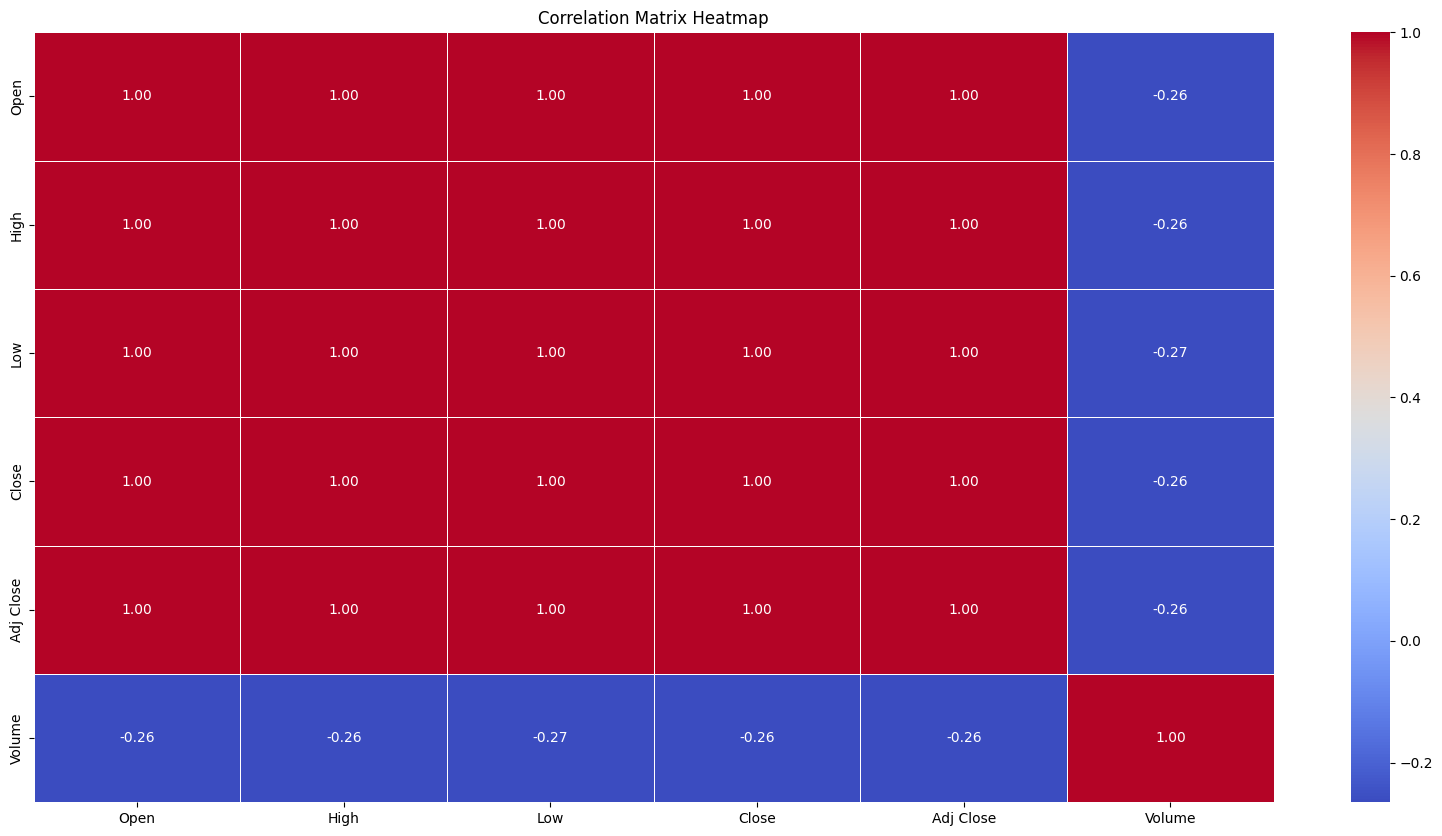

In [38]:
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [39]:
# resampling to monthly mean prices

monthly_mean = df.resample('M').mean()
print(monthly_mean)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1997-05-31    0.084328    0.086127    0.076657    0.079427    0.079427   
1997-06-30    0.077393    0.078919    0.075198    0.076885    0.076885   
1997-07-31    0.108428    0.113352    0.105232    0.110275    0.110275   
1997-08-31    0.111148    0.113715    0.107701    0.111570    0.111570   
1997-09-30    0.171205    0.181746    0.164187    0.174628    0.174628   
...                ...         ...         ...         ...         ...   
2022-12-31   88.483334   89.462382   86.800477   87.937142   87.937142   
2023-01-31   93.452000   95.421500   92.107000   94.223500   94.223500   
2023-02-28   99.101579  100.613158   97.457894   99.214211   99.214211   
2023-03-31   96.298262   97.842174   94.954783   96.546956   96.546956   
2023-04-30  102.986669  103.800001  101.430000  102.486666  102.486666   

                  Volume  
Date      

/var/folders/q2/6_bxqgtn53v7c70h1gbxmrkw0000gp/T/ipykernel_11164/2691147110.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = df.resample('M').mean()


In [40]:
# resampling to yearly mean price

yearly_mean = df.resample('Y').mean()
print(yearly_mean)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1997-12-31    0.155724    0.161497    0.150431    0.156320    0.156320   
1998-12-31    0.777548    0.811660    0.749908    0.783056    0.783056   
1999-12-31    3.470436    3.601638    3.317595    3.453116    3.453116   
2000-12-31    2.330115    2.426299    2.230878    2.326683    2.326683   
2001-12-31    0.613213    0.637426    0.585813    0.610021    0.610021   
2002-12-31    0.820317    0.845905    0.800587    0.824206    0.824206   
2003-12-31    1.880345    1.915065    1.850016    1.887069    1.887069   
2004-12-31    2.177875    2.216688    2.141812    2.178262    2.178262   
2005-12-31    1.991020    2.019069    1.969409    1.994855    1.994855   
2006-12-31    1.793612    1.820769    1.768171    1.795466    1.795466   
2007-12-31    3.355741    3.407827    3.305508    3.361474    3.361474   
2008-12-31    3.491953    3.588350    

/var/folders/q2/6_bxqgtn53v7c70h1gbxmrkw0000gp/T/ipykernel_11164/1140800936.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_mean = df.resample('Y').mean()


In [41]:
# calculate monthly returns
monthly_return = df['Close'].resample('M').last().pct_change()

/var/folders/q2/6_bxqgtn53v7c70h1gbxmrkw0000gp/T/ipykernel_11164/3497959648.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_return = df['Close'].resample('M').last().pct_change()


In [42]:
# calculate yearly returns
yearly_return = df['Close'].resample('Y').last().pct_change()

/var/folders/q2/6_bxqgtn53v7c70h1gbxmrkw0000gp/T/ipykernel_11164/3042603348.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_return = df['Close'].resample('Y').last().pct_change()


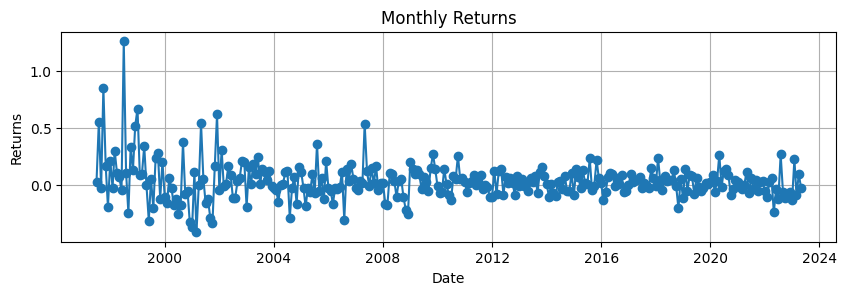

In [43]:
# plotting

plt.figure(figsize=(10, 6))

# monthly return plot
plt.subplot(2,1,1)
plt.plot(monthly_return.index, monthly_return, marker='o', linestyle='-')
plt.title('Monthly Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.grid(True)

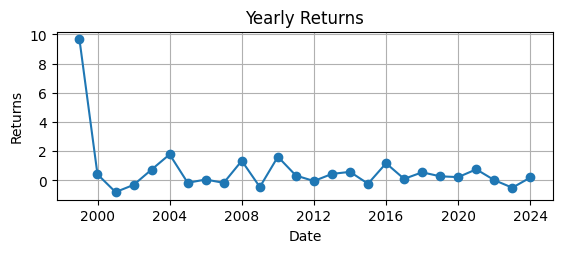

In [44]:
# yearly plot
plt.subplot(2,1,1)
plt.plot(yearly_return.index, yearly_return, marker='o', linestyle='-')
plt.title("Yearly Returns")
plt.xlabel('Date')
plt.ylabel('Returns')
plt.grid(True)

In [45]:

# calculating moving averages (50-day and 200-day)

df['50-Day MA'] = df['Close'].rolling(window=50).mean()
df['200-Day MA'] = df['Close'].rolling(window=200).mean()

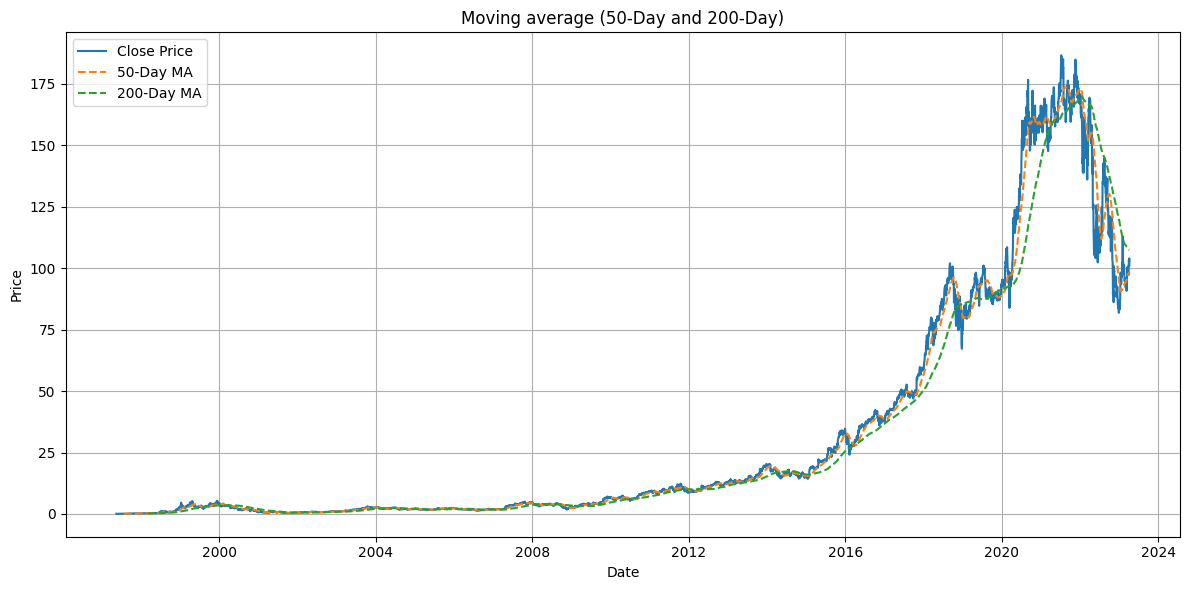

In [48]:
# plotting moving averages

# plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price', linewidth=1.5)
plt.plot(df.index, df['50-Day MA'], label='50-Day MA', linestyle='--', linewidth=1.5)
plt.plot(df.index, df['200-Day MA'], label='200-Day MA', linestyle='--', linewidth=1.5)


# customize plot
plt.title('Moving average (50-Day and 200-Day)')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [49]:
# calculating rolling volatility

# calculate daily returns
df['Daily Returns'] = df['Close'].pct_change()

# calculate rolling volatility (rolling standar deviation of daily returns)
window = 30
df['Volatility'] = df['Daily Returns'].rolling(window=window).std() * (252*0.5) # annualized volatility



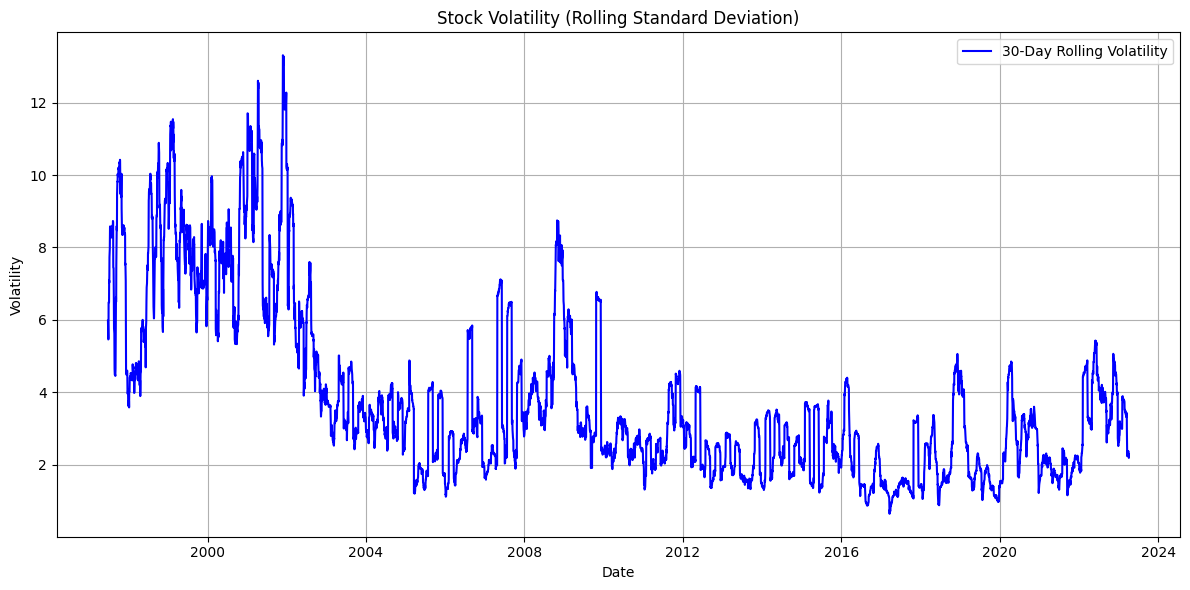

In [51]:
# plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volatility'], label=f'{window}-Day Rolling Volatility', color='blue', linewidth=1.5)

# customize plot
plt.title('Stock Volatility (Rolling Standard Deviation)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()

# display plot
plt.show()

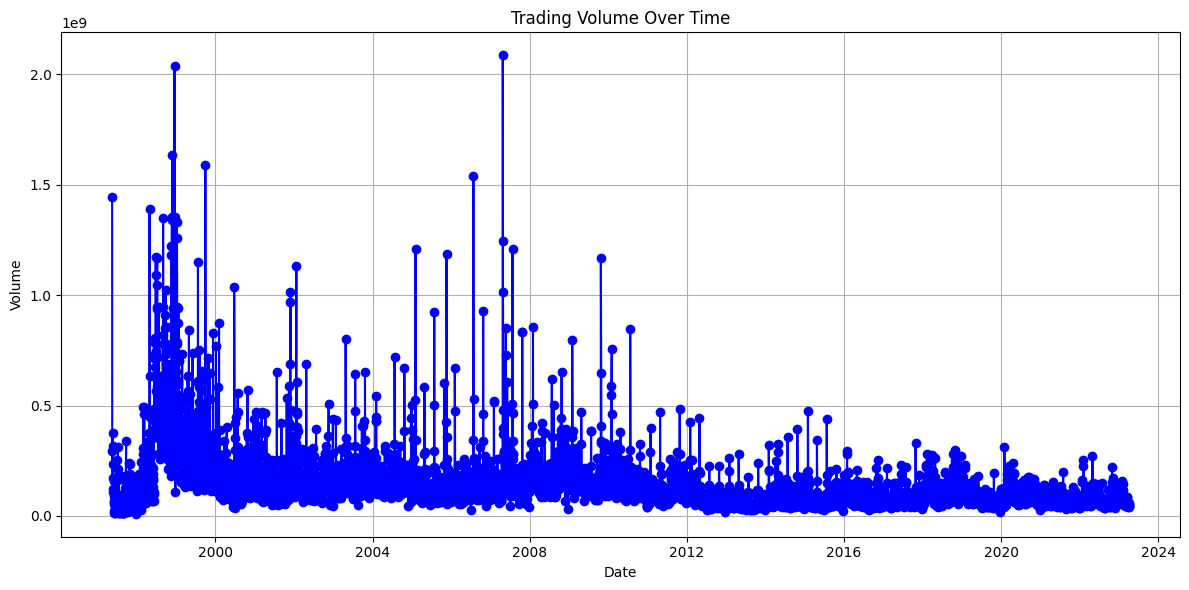

In [54]:
# plotting trading volume over time

# plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volume'], marker='o', linestyle='-', color='b')

# customize plot
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(True)
plt.tight_layout()

plt.show()

In [55]:
# days with unusually high trading volume

mean_volume = df['Volume'].mean()
std_volume = df['Volume'].std()

In [56]:
# define threshold for unusually high trading volumes (e.g., volumes greater than mean + 2 * std_dev)

threshold = mean_volume + 2 * std_volume

In [57]:
# identify days with unusually high trading volumes

unusual_days = df[df['Volume'] > threshold]

print(unusual_days[['Volume']])



                Volume
Date                  
1997-05-15  1443120000
1998-02-27   494136000
1998-03-09   461112000
1998-03-10   495000000
1998-04-28  1391880000
...                ...
2011-10-26   482684000
2012-02-01   426732000
2012-04-27   442338000
2015-01-30   477122000
2015-07-24   438188000

[250 rows x 1 columns]


           Open      High       Low     Close
Open   1.000000  0.999913  0.999894  0.999789
High   0.999913  1.000000  0.999868  0.999899
Low    0.999894  0.999868  1.000000  0.999903
Close  0.999789  0.999899  0.999903  1.000000


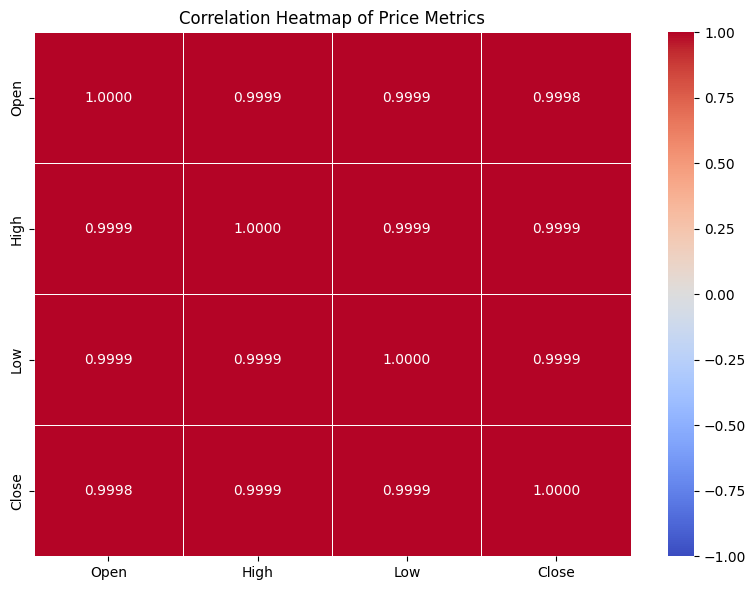

In [61]:
# compute correlation
price_correlations = df[['Open', 'High', 'Low', 'Close']].corr()

print(price_correlations)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(price_correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.4f', linewidths=0.5)
plt.title('Correlation Heatmap of Price Metrics')
plt.tight_layout()
plt.show()

In [64]:
# calculate cumulative returns

# calculate daily returns
df['Daily Returns'] = df['Close'].pct_change()

# calculate cumulative return
df['Cumulative Returns'] = (1 + df['Daily Returns']).cumprod() - 1

print(df[['Cumulative Returns']])

            Cumulative Returns
Date                          
1997-05-15                 NaN
1997-05-16           -0.117028
1997-05-19           -0.127659
1997-05-20           -0.164895
1997-05-21           -0.271281
...                        ...
2023-03-30         1040.698581
2023-03-31         1053.873015
2023-04-03         1044.885842
2023-04-04         1060.613377
2023-04-05         1031.507103

[6516 rows x 1 columns]
